In [ ]:
import pandas as pd
import numpy as np
import torch
import os
import librosa
import itertools
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, as_completed

In [2]:
tracks = pd.read_csv('fma_metadata/fma_metadata/tracks.csv', index_col=0, header=[0, 1])

print(tracks.shape)

(106574, 52)


In [ ]:
col_names = [
    'stft_mean_0', 'stft_std_0',
    'stft_mean_1', 'stft_std_1',
    'stft_mean_2', 'stft_std_2',
    'stft_mean_3', 'stft_std_3',
    'stft_mean_4', 'stft_std_4',
    'stft_mean_5', 'stft_std_5',
    'stft_mean_6', 'stft_std_6',
    'stft_mean_7', 'stft_std_7',
    'stft_mean_8', 'stft_std_8',
    'stft_mean_9', 'stft_std_9',
    'stft_mean_10', 'stft_std_10',
    'stft_mean_11', 'stft_std_11',
    'cqt_mean_0', 'cqt_std_0',
    'cqt_mean_1', 'cqt_std_1',
    'cqt_mean_2', 'cqt_std_2',
    'cqt_mean_3', 'cqt_std_3',
    'cqt_mean_4', 'cqt_std_4',
    'cqt_mean_5', 'cqt_std_5',
    'cqt_mean_6', 'cqt_std_6',
    'cqt_mean_7', 'cqt_std_7',
    'cqt_mean_8', 'cqt_std_8',
    'cqt_mean_9', 'cqt_std_9',
    'cqt_mean_10', 'cqt_std_10',
    'cqt_mean_11', 'cqt_std_11',
    'cens_mean_0', 'cens_std_0',
    'cens_mean_1', 'cens_std_1',
    'cens_mean_2', 'cens_std_2',
    'cens_mean_3', 'cens_std_3',
    'cens_mean_4', 'cens_std_4',
    'cens_mean_5', 'cens_std_5',
    'cens_mean_6', 'cens_std_6',
    'cens_mean_7', 'cens_std_7',
    'cens_mean_8', 'cens_std_8',
    'cens_mean_9', 'cens_std_9',
    'cens_mean_10', 'cens_std_10',
    'cens_mean_11', 'cens_std_11',
    'mfccs_mean_0', 'mfccs_std_0',
    'mfccs_mean_1', 'mfccs_std_1',
    'mfccs_mean_2', 'mfccs_std_2',
    'mfccs_mean_3', 'mfccs_std_3',
    'mfccs_mean_4', 'mfccs_std_4',
    'mfccs_mean_5', 'mfccs_std_5',
    'mfccs_mean_6', 'mfccs_std_6',
    'mfccs_mean_7', 'mfccs_std_7',
    'mfccs_mean_8', 'mfccs_std_8',
    'mfccs_mean_9', 'mfccs_std_9',
    'mfccs_mean_10', 'mfccs_std_10',
    'mfccs_mean_11', 'mfccs_std_11',
    'mfccs_mean_12', 'mfccs_std_12',
    'mfccs_mean_13', 'mfccs_std_13',
    'mfccs_mean_14', 'mfccs_std_14',
    'mfccs_mean_15', 'mfccs_std_15',
    'mfccs_mean_16', 'mfccs_std_16',
    'mfccs_mean_17', 'mfccs_std_17',
    'mfccs_mean_18', 'mfccs_std_18',
    'mfccs_mean_19', 'mfccs_std_19',
    'rms_mean_0', 'rms_std_0',
    'centroid_mean_0', 'centroid_std_0',
    'bandwidth_mean_0', 'bandwidth_std_0',
    'contrast_mean_0', 'contrast_std_0',
    'contrast_mean_1', 'contrast_std_1',
    'contrast_mean_2', 'contrast_std_2',
    'contrast_mean_3', 'contrast_std_3',
    'contrast_mean_4', 'contrast_std_4',
    'contrast_mean_5', 'contrast_std_5',
    'contrast_mean_6', 'contrast_std_6',
    'flatness_mean_0', 'flatness_std_0',
    'rolloff_mean_0', 'rolloff_std_0',
    'tonnetz_mean_0', 'tonnetz_std_0',
    'tonnetz_mean_1', 'tonnetz_std_1',
    'tonnetz_mean_2', 'tonnetz_std_2',
    'tonnetz_mean_3', 'tonnetz_std_3',
    'tonnetz_mean_4', 'tonnetz_std_4',
    'tonnetz_mean_5', 'tonnetz_std_5',
    'zcr_mean_0', 'zcr_std_0',
    'genre', 'track_id'
]

spec_base = '...'

<>:80: SyntaxWarning: invalid escape sequence '\p'
<>:80: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Mellifus\AppData\Local\Temp\ipykernel_22384\1229212862.py:80: SyntaxWarning: invalid escape sequence '\p'
  spec_base = 'C:\\Dev\\workplace\\Uni\\447\proj\\fma_small\\spectrograms'


In [ ]:
BASE_PATH = '...'

def get_audio_paths(base_path):
    paths = []

    for audio_dir in os.listdir(base_path):
        audio_path = os.path.join(base_path, audio_dir)

        if os.path.isdir(audio_path): # Check if it is a file or directory (need directories)
            for audio_name in os.listdir(audio_path):
                audio_full_path = os.path.join(audio_path, audio_name)

                paths.append(audio_full_path)

    return paths

def extract_spectrogram(path):
    y, sr = librosa.load(path, sr=22050)

    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Normalize to 0-255
    if (mel_spec_db.max() - mel_spec_db.min() == np.nan) or (mel_spec_db.max() - mel_spec_db.min()) == 0:
        print('Something wrong ', path)

    mel_norm = (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min())
    mel_img = (mel_norm * 255).astype(np.uint8)

    tensor = torch.from_numpy(mel_img)
    return tensor

def create_spectrograms(base_path):
    paths = get_audio_paths(base_path)

    rows = []

    for path in tqdm(paths, total=len(paths), desc='Extracting spectrograms'):
        file_name = os.path.basename(path)
        track_id = int(os.path.splitext(file_name)[0])
        genre = tracks.loc[track_id, ('track', 'genre_top')]

        try:
            spectrogram = extract_spectrogram(path)
        except Exception as e:
            print('An error of this type occurred: ', type(e))
            print(str(e))
            continue

        output_path = os.path.join(spec_base, f"{track_id}.pt")

        if os.path.exists(output_path):
            print(f"{output_path} already exists.")
            continue

        torch.save(spectrogram, output_path)
        rows.append([track_id, genre, f"spectrograms/{track_id}.pt"])

    df = pd.DataFrame(rows)
    df.columns = ['track_id', 'genre', 'spectrogram_path']
    df = df.set_index('track_id')
    return df

In [ ]:
df = create_spectrograms(BASE_PATH)

print(df.head())

In [68]:
df.to_csv('fma_spectrograms.csv')

In [2]:
df_train = pd.read_csv('fma/fma_train.csv', index_col=0)
df_test = pd.read_csv('fma/fma_test.csv', index_col=0)

In [5]:
le = LabelEncoder()

df_train['genre'] = le.fit_transform(df_train['genre'])
df_test['genre'] = le.transform(df_test['genre'])

genres_labels = le.classes_
genres = le.inverse_transform(np.arange(8))
print(genres)

['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock']


In [ ]:
Xtrain = df_train.drop('genre', axis='columns')
Ytrain = df_train['genre']
Xtest = df_test.drop('genre', axis='columns')
Ytest = df_test['genre']

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(63927, 150)
(15968, 150)
(63927,)
(15968,)


In [7]:
scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

Naive Bayes Train Accuracy: 0.4005506280601311
Naive Bayes Test Accuracy: 0.38038577154308617
              precision    recall  f1-score   support

           0       0.36      0.12      0.18      1990
           1       0.49      0.15      0.23      2000
           2       0.40      0.46      0.43      2000
           3       0.43      0.72      0.54      1991
           4       0.40      0.54      0.46      1990
           5       0.35      0.26      0.30      2000
           6       0.24      0.11      0.15      1997
           7       0.34      0.68      0.45      2000

    accuracy                           0.38     15968
   macro avg       0.38      0.38      0.34     15968
weighted avg       0.38      0.38      0.34     15968



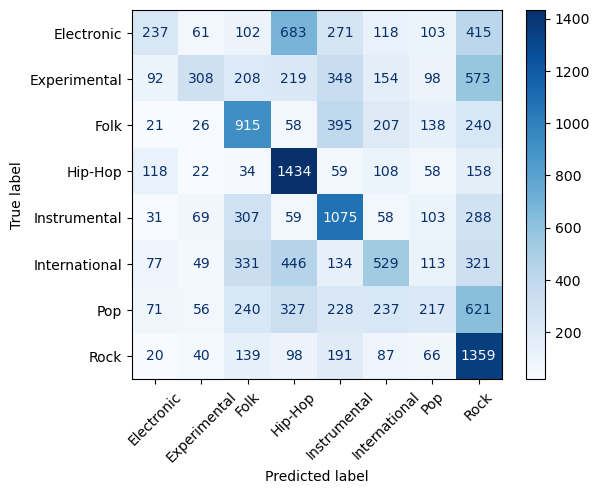

In [8]:
gnb = GaussianNB()

gnb.fit(Xtrain, Ytrain)

y_pred_nb = gnb.predict(Xtrain)

print("Naive Bayes Train Accuracy:", accuracy_score(Ytrain, y_pred_nb))

y_pred_nb = gnb.predict(Xtest)

print("Naive Bayes Test Accuracy:", accuracy_score(Ytest, y_pred_nb))
print(classification_report(Ytest, y_pred_nb))

cm = confusion_matrix(Ytest, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='Blues', xticks_rotation=45)

Pure MLP Test Accuracy: 0.4748246492985972
              precision    recall  f1-score   support

           0       0.48      0.45      0.47      1990
           1       0.42      0.37      0.39      2000
           2       0.51      0.58      0.54      2000
           3       0.55      0.57      0.56      1991
           4       0.46      0.50      0.48      1990
           5       0.52      0.52      0.52      2000
           6       0.29      0.27      0.28      1997
           7       0.57      0.54      0.56      2000

    accuracy                           0.47     15968
   macro avg       0.47      0.47      0.47     15968
weighted avg       0.47      0.47      0.47     15968

Pure MLP Train Accuracy: 0.7241228276002315


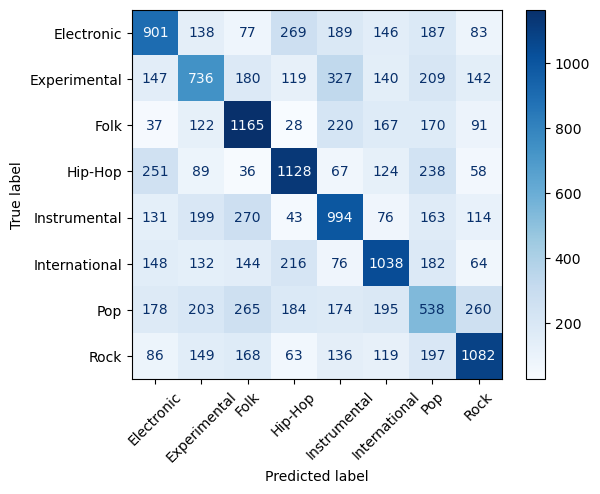

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=500, alpha=1e-4, validation_fraction=0.2)

mlp.fit(Xtrain, Ytrain)

pred_mlp = mlp.predict(Xtest)

print("Pure MLP Test Accuracy:", accuracy_score(Ytest, pred_mlp))
print(classification_report(Ytest, pred_mlp))

cm = confusion_matrix(Ytest, pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='Blues', xticks_rotation=45)

pred_mlp = mlp.predict(Xtrain)

print("Pure MLP Train Accuracy:", accuracy_score(Ytrain, pred_mlp))

SVM RBF Train Accuracy: 0.8467470708777199
Pure MLP Test Accuracy: 0.5269914829659319
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1990
           1       0.48      0.41      0.44      2000
           2       0.54      0.64      0.58      2000
           3       0.59      0.65      0.62      1991
           4       0.50      0.54      0.52      1990
           5       0.60      0.54      0.57      2000
           6       0.35      0.28      0.31      1997
           7       0.60      0.62      0.61      2000

    accuracy                           0.53     15968
   macro avg       0.52      0.53      0.52     15968
weighted avg       0.52      0.53      0.52     15968



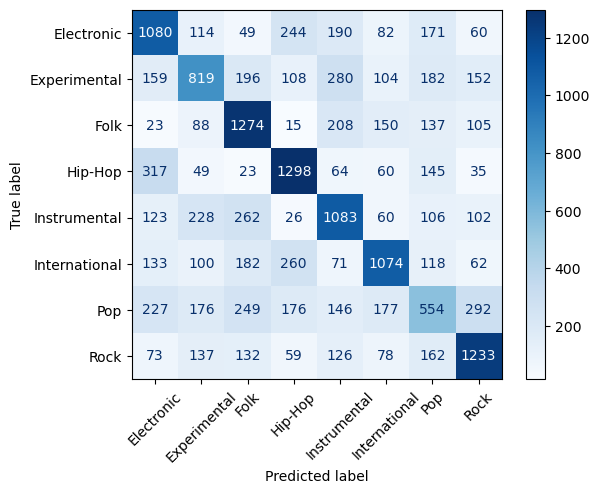

In [10]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

svm_rbf.fit(Xtrain, Ytrain)

pred_svm = svm_rbf.predict(Xtrain)

print("SVM RBF Train Accuracy:", accuracy_score(Ytrain, pred_svm))

pred_svm = svm_rbf.predict(Xtest)

print("Pure MLP Test Accuracy:", accuracy_score(Ytest, pred_svm))
print(classification_report(Ytest, pred_svm))

cm = confusion_matrix(Ytest, pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.savefig('svmrbf_cm_fma.png', bbox_inches='tight', dpi=300)

SVM RBF Train Accuracy: 0.7512318738561171
Pure MLP Test Accuracy: 0.48904058116232463
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      1990
           1       0.45      0.36      0.40      2000
           2       0.50      0.57      0.53      2000
           3       0.59      0.64      0.61      1991
           4       0.52      0.45      0.48      1990
           5       0.55      0.51      0.53      2000
           6       0.31      0.35      0.33      1997
           7       0.56      0.58      0.57      2000

    accuracy                           0.49     15968
   macro avg       0.49      0.49      0.49     15968
weighted avg       0.49      0.49      0.49     15968



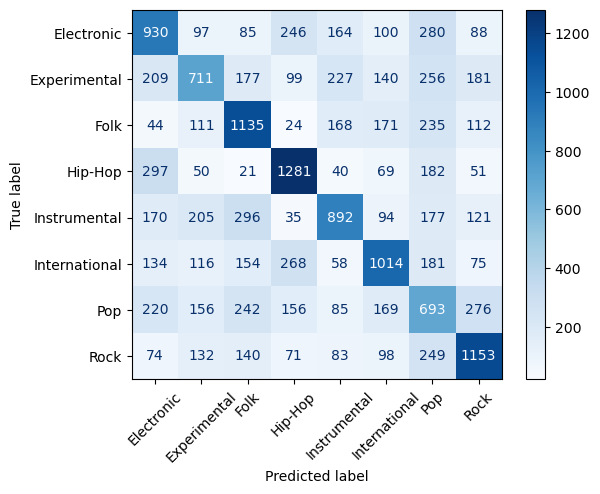

In [12]:
svm_poly = SVC(kernel='poly', degree=2, probability=True)

svm_poly.fit(Xtrain, Ytrain)

pred_svm = svm_poly.predict(Xtrain)

print("SVM RBF Train Accuracy:", accuracy_score(Ytrain, pred_svm))

pred_svm = svm_poly.predict(Xtest)

print("Pure MLP Test Accuracy:", accuracy_score(Ytest, pred_svm))
print(classification_report(Ytest, pred_svm))

cm = confusion_matrix(Ytest, pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='Blues', xticks_rotation=45)

SVM RBF Train Accuracy: 0.5321225773147497
Pure MLP Test Accuracy: 0.4770791583166333
              precision    recall  f1-score   support

           0       0.46      0.49      0.48      1990
           1       0.45      0.34      0.39      2000
           2       0.47      0.58      0.52      2000
           3       0.56      0.64      0.60      1991
           4       0.43      0.55      0.48      1990
           5       0.48      0.44      0.46      2000
           6       0.32      0.19      0.24      1997
           7       0.58      0.59      0.58      2000

    accuracy                           0.48     15968
   macro avg       0.47      0.48      0.47     15968
weighted avg       0.47      0.48      0.47     15968



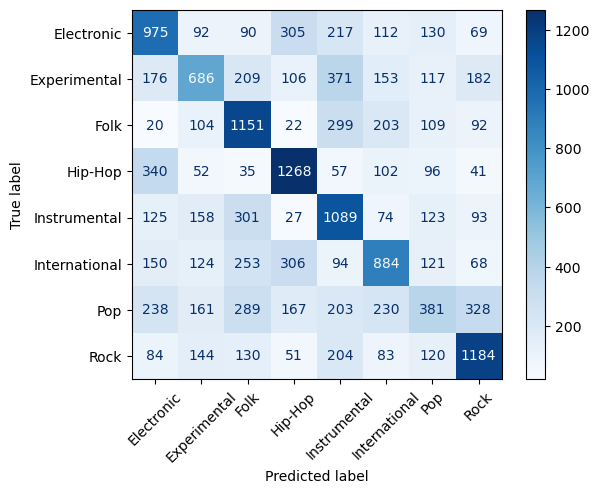

In [11]:
svm_lin = SVC(kernel='linear', probability=True)

Xtrain_norm = normalize(Xtrain)
Xtest_norm = normalize(Xtest)

svm_lin.fit(Xtrain_norm, Ytrain)

pred_svm = svm_lin.predict(Xtrain_norm)

print("SVM RBF Train Accuracy:", accuracy_score(Ytrain, pred_svm))

pred_svm = svm_lin.predict(Xtest_norm)

print("Pure MLP Test Accuracy:", accuracy_score(Ytest, pred_svm))
print(classification_report(Ytest, pred_svm))

cm = confusion_matrix(Ytest, pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='Blues', xticks_rotation=45)

SVM RBF Train Accuracy: 0.400625488663018
Pure MLP Test Accuracy: 0.41588492808005
              precision    recall  f1-score   support

           0       0.39      0.46      0.42       200
           1       0.34      0.24      0.28       200
           2       0.50      0.42      0.46       200
           3       0.59      0.53      0.56       199
           4       0.35      0.42      0.39       200
           5       0.36      0.48      0.41       200
           6       0.28      0.15      0.20       200
           7       0.49      0.61      0.55       200

    accuracy                           0.42      1599
   macro avg       0.41      0.42      0.41      1599
weighted avg       0.41      0.42      0.41      1599



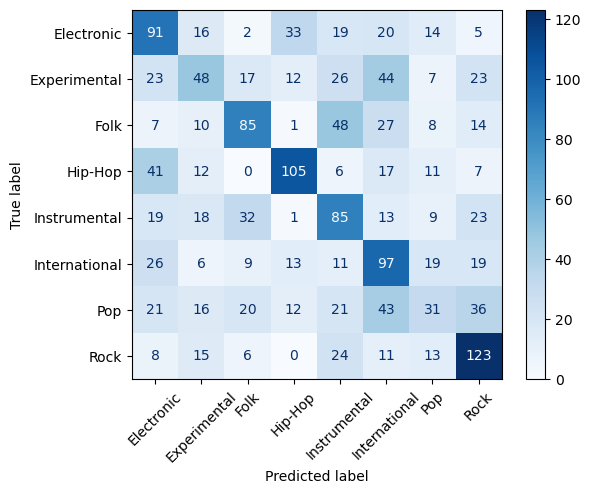

In [122]:
svm_sig = SVC(kernel='sigmoid', probability=True)

svm_sig.fit(Xtrain, Ytrain)

pred_svm = svm_sig.predict(Xtrain)

print("SVM RBF Train Accuracy:", accuracy_score(Ytrain, pred_svm))

pred_svm = svm_sig.predict(Xtest)

print("Pure MLP Test Accuracy:", accuracy_score(Ytest, pred_svm))
print(classification_report(Ytest, pred_svm))

cm = confusion_matrix(Ytest, pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='Blues', xticks_rotation=45)